In [72]:
## All the import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import table 
import copy

In [3]:
# Tentative: Insert data
new_pd = pd.read_excel("./Concrete_Data.xls")
new_pd

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [79]:
# Helper Functions
# See if the current value is categorical
# https://stackoverflow.com/questions/26924904/check-if-dataframe-column-is-categorical
def is_categorical(df):
    return df.dtype.name == 'category'

# https://stackoverflow.com/questions/69687640/how-to-iterate-over-columns-using-pandas
# first categorical, numberical, date
def get_type_number(df):
    result = [0, 0, 0]
    for i in range(0, len(df.columns)):
        if(is_categorical(new_pd[df.columns[i]])):
            result[0] = result[0] + 1
        else:
            result[1] = result[1] + 1
            ## [NS]
        if(new_pd[df.columns[i]].dtype.name == 'datetime64[ns]'):
            result[2] = result[2] + 1
    return result

In [85]:
# Initialize rule-based learning recommendation system
all_recommend_dict = {}
# Part 1: Before Additional Part
all_recommend_dict["text_table"] = 1
all_recommend_dict["aligned_bar"] = 0#2
all_recommend_dict["stacked_bar"] = 0#2 # 3 with 3 C
all_recommend_dict["discrete_line"] = 0#4
all_recommend_dict["scatter_plot"] = 0#5
all_recommend_dict["gantt_chart"] = 0#6

all_recommend_array = ["text_table", "aligned_bar", "stacked_bar", "discrete_line", "scatter_plot", "gantt_chart"]



In [89]:
# Rule-based Learning Process
# https://stackoverflow.com/questions/20297332/how-do-i-retrieve-the-number-of-columns-in-a-pandas-data-frame
def rule_based_filtering(df, all_recommend_dict):
    all_recommend_dict = copy.deepcopy(all_recommend_dict)
    all_valid_charts = []
    df_categorical_status = get_type_number(df)
    if(len(df.columns) > 0):
        all_valid_charts.append("text_table")
    if(df_categorical_status[1] >= 1):
        all_valid_charts.append("aligned_bar")
        all_recommend_dict["aligned_bar"] = 2#2
    if(df_categorical_status[0] >= 2 and df_categorical_status[1] >= 1):
        all_valid_charts.append("stacked_bar")
        all_recommend_dict["stacked_bar"] = 2
        if(df_categorical_status[0] >= 3):
            all_recommend_dict["stacked_bar"] = 3
    # https://stackoverflow.com/questions/43214204/how-do-i-tell-if-a-column-in-a-pandas-dataframe-is-of-type-datetime-how-do-i-te
    if(df_categorical_status[2] >= 1 and df_categorical_status[1] >= 1):
        all_valid_charts.append("discrete_line")
        all_recommend_dict["discrete_line"] = 4
    if(df_categorical_status[1] >= 2 and df_categorical_status[1] <= 4):
        all_valid_charts.append("scatter_plot")
        all_recommend_dict["scatter_plot"] = 3
    if(df_categorical_status[1] == 2):
        all_recommend_dict["scatter_plot"] = 5
    
    return all_recommend_dict

        
rule_based_filtering(new_pd, all_recommend_dict)


{'text_table': 1,
 'aligned_bar': 2,
 'stacked_bar': 0,
 'discrete_line': 0,
 'scatter_plot': 0,
 'gantt_chart': 0}

In [90]:
def preprocess_name(string):
    return string.split(" ")[0]

# All valid visualizations listed here.
def table_visualization(data):
    ax = plt.subplot(111, frame_on=False, directory='my_visualization.png') # no visible frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis

    table(ax, data)  # where df is your data frame

    plt.savefig('mytable.png')
    
def aligned_bar_visualization(df, default='AVG', directory='my_visualization.png'):
    # https://stackabuse.com/matplotlib-bar-plot-tutorial-and-examples/
    # https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean
    name_for_visualization = []
    data_for_visualization = []
    for i in range(0, len(df.columns)):
        new_name = preprocess_name(new_pd[df.columns[i]].name)
        name_for_visualization.append(new_name)
        data_for_visualization.append(new_pd[df.columns[i]].mean())
    plt.title("Aligned Bar Visualization for " + default + " choice")
    plt.bar(name_for_visualization, data_for_visualization)
    #DO NOT SHOW IT!
    plt.savefig(directory)
    return directory

def stacked_bar_visualization(df, default='AVG', directory='my_visualization.png'):
    ##Unimplemented
    
## Currently only for 2 data
def scatter_plot_visualization(df, default='AVG', directory='my_visualization.png'):
    ##Unimplemented   


IndentationError: expected an indented block (<ipython-input-90-edb05170f77d>, line 33)

'my_visualization.png'

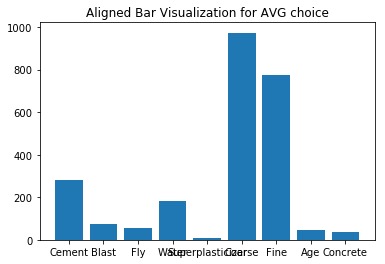

In [70]:
#table_visualization(new_pd)
aligned_bar_visualization(new_pd)

In [66]:
# https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlibs
fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.plot([0,1,2], [10,20,3])
fig.savefig('./1.png')   # save the figure to file
plt.close(fig)    # close the figure window
